In [1]:
%cd ..

/home/elias/work/generative-scattering-networks


In [2]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from kymatio import Scattering2D
from PIL import Image
from torchvision.transforms import ToTensor, Resize, Compose

from EmbeddingsImagesDataset import EmbeddingsTransformDataset

In [3]:
im = Image.open("/home/elias/datasets/celeba_hq/1024_rgb/train/0.jpg")
print(im)

transform = Compose([
    Resize((128, 128)),
    ToTensor(),
])

x = transform(im)
print(x.shape)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F429D8B12E8>
torch.Size([3, 128, 128])


In [20]:
scattering = Scattering2D(J=4, shape=(128, 128))

In [21]:
Sx = scattering(x)
print(Sx.shape)

torch.Size([3, 417, 8, 8])


In [24]:
X = Sx.view(-1, 8, 8)
print(X.shape)

torch.Size([1251, 8, 8])


<IPython.core.display.Javascript object>


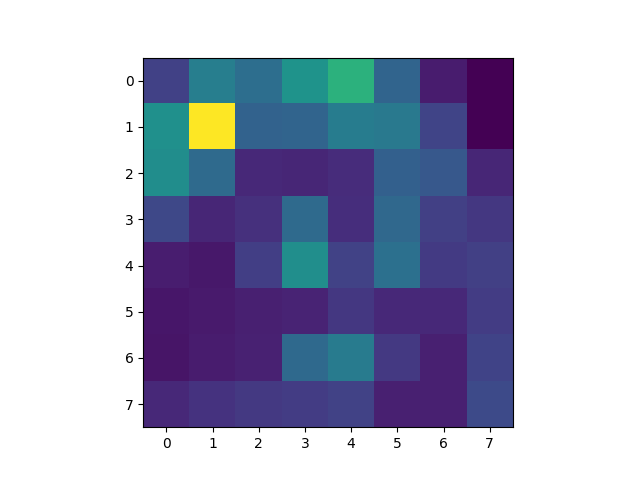

[]

In [31]:
plt.figure()
plt.imshow(X[5,:,:].reshape(8, 8))
plt.plot()

In [4]:
dataset = EmbeddingsTransformDataset(
    '/home/elias/datasets/celeba_hq/1024_rgb_SJ4/train/',
    '/home/elias/datasets/celeba_hq/1024_rgb/train/',
    transform)

<IPython.core.display.Javascript object>


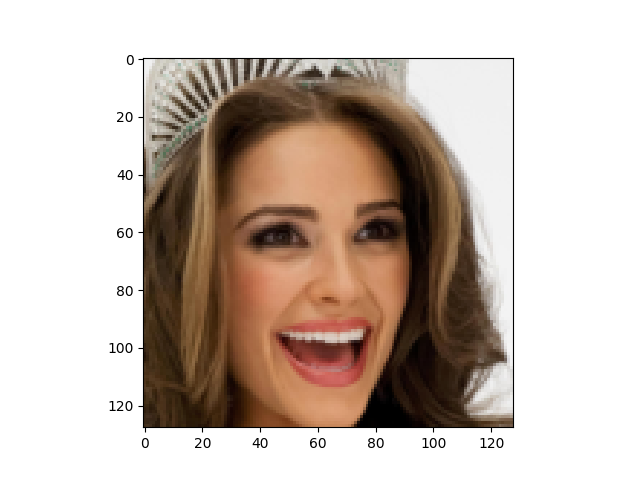

[]

In [5]:
plt.figure()
plt.imshow(((dataset[0]['x'].permute(1, 2, 0) + 1)*127.5))
plt.plot()

<IPython.core.display.Javascript object>


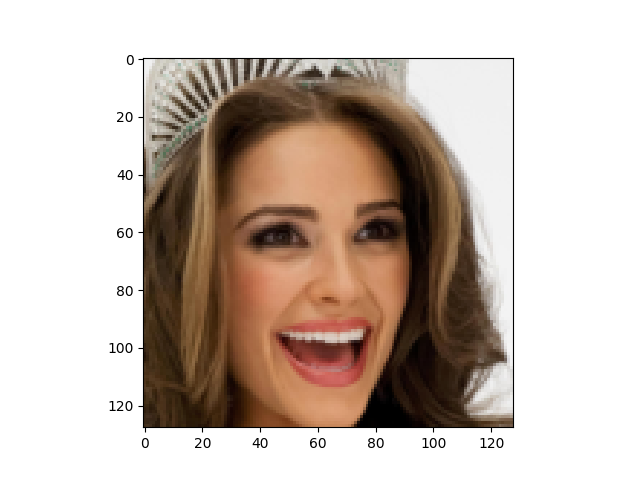

In [16]:
image = np.uint8(((dataset[0]['x'].permute(1, 2, 0) + 1)*127.5)*255)

plt.figure()
plt.imshow(image)
plt.show()